<a href="https://colab.research.google.com/github/Lina1719/4thassignment/blob/main/Image%20Classification%20Using%20a%20Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import imageio
import matplotlib.pyplot as plt
import numpy as np

# scikit-image for image filtering
from skimage import color, io
from skimage.exposure import rescale_intensity
from skimage.transform import resize

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

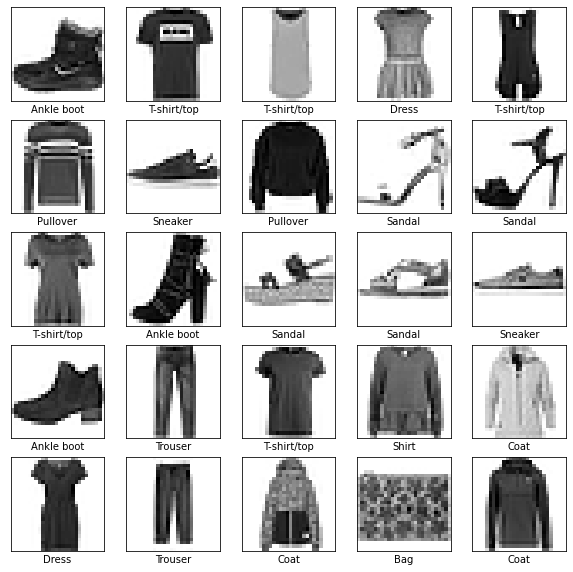

In [7]:
# plot first 25 images 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# Setup Architecture Base Model

model = Sequential()
################################### Feature Extraction Layers ###########################
# convolution + relu layer   
# In this layers filtering is applied. You don't have to tell convolution layer what the filters are,
# you only need to tell the filter size and how many filters you want, so we specified 32 filters to detect 32 different features
# and the filter size is 3x3. Also specify activation function, which is relu. The last parameter we have to specify is input shape,
# the shape of images which are 32x32x3
model.add(Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1))),

# pooling layer
# Here we do Max pooling 2x2
model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')),
################################# Classification Layers #################################
# Flatten creates one-dimentional array by "flattening" 2-dimentional array
model.add(Flatten())

# create fully connected Dense layer
model.add(Dense(64, activation='relu'))

# create output layer (in the output layer, we have to specify the number of neurons how many labels we have in dataset.
# in our case, we have 10 labels, then we specify 10 neurons) and activation function 'softmax'
# this function will normalize our probability
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 64)                302912    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 303,842
Trainable params: 303,842
Non-trainable params: 0
__________________________________________________

In [10]:
# Compile Model
# to compile a model, we have to specify optimizer, loss and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy for loss is required becasue we have multiclass classification model
              metrics=['accuracy'])

In [11]:
# Fit Model 
with tf.device('/GPU:0'):
    results = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.4255 - accuracy: 0.8491 - val_loss: 0.3428 - val_accuracy: 0.8817
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2856 - accuracy: 0.8978 - val_loss: 0.2975 - val_accuracy: 0.8918
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2456 - accuracy: 0.9107 - val_loss: 0.2986 - val_accuracy: 0.8935
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2160 - accuracy: 0.9218 - val_loss: 0.2646 - val_accuracy: 0.9041
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1915 - accuracy: 0.9305 - val_loss: 0.2673 - val_accuracy: 0.9024
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1714 - accuracy: 0.9373 - val_loss: 0.2557 - val_accuracy: 0.9093
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1526 - accuracy: 0.9442 - val_loss: 0.2587 -

In [12]:
# history from 10 epochs that were ran by a model (loss, accuracy, validation loss, validation accuracy)
results.history

{'loss': [0.42545533180236816,
  0.2856053113937378,
  0.24561628699302673,
  0.21597711741924286,
  0.19153201580047607,
  0.17136907577514648,
  0.15259265899658203,
  0.13731001317501068,
  0.12363271415233612,
  0.10999451577663422],
 'accuracy': [0.8490666747093201,
  0.897849977016449,
  0.9107499718666077,
  0.9218166470527649,
  0.9304500222206116,
  0.9372833371162415,
  0.9442499876022339,
  0.9502666592597961,
  0.9542666673660278,
  0.959933340549469],
 'val_loss': [0.3428402543067932,
  0.29746368527412415,
  0.29863351583480835,
  0.26459717750549316,
  0.2673051655292511,
  0.25566327571868896,
  0.2586975395679474,
  0.27392831444740295,
  0.2860681116580963,
  0.2840753495693207],
 'val_accuracy': [0.8816999793052673,
  0.8917999863624573,
  0.8934999704360962,
  0.9041000008583069,
  0.902400016784668,
  0.9093000292778015,
  0.9111999869346619,
  0.9081000089645386,
  0.9154999852180481,
  0.9128000140190125]}

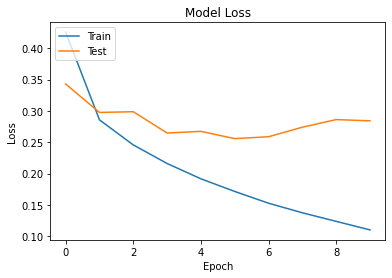

In [13]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

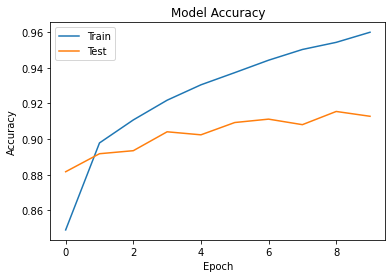

In [14]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [15]:
# Evaluate Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.2841 - accuracy: 0.9128 - 2s/epoch - 8ms/step


In [16]:
# predictions are probability distributions between 0 and 1 (because of softmax)
pred = model.predict(test_images)

pred

313/313 [==============================] - 3s 9ms/step


array([[8.4620017e-10, 1.3279781e-09, 4.4131347e-09, ..., 3.1961285e-05,
        2.1185198e-09, 9.9996692e-01],
       [5.2988302e-04, 8.1342276e-15, 9.9745500e-01, ..., 1.0450915e-17,
        1.7669604e-09, 3.2537185e-14],
       [4.0366741e-09, 9.9999994e-01, 7.2384555e-12, ..., 3.2990615e-22,
        1.8938033e-09, 4.0629923e-16],
       ...,
       [6.3121499e-09, 5.6682626e-13, 3.3250281e-08, ..., 1.3158004e-09,
        9.9999553e-01, 2.8480218e-11],
       [1.7297924e-09, 9.9999994e-01, 3.5807795e-09, ..., 1.5610520e-19,
        1.0883113e-11, 4.9588172e-12],
       [1.4033730e-04, 5.6231929e-05, 1.4394817e-03, ..., 6.1135832e-03,
        4.5840419e-04, 1.3877015e-03]], dtype=float32)

In [17]:
# So we need to find which is the max
# for this we can use argmax function from numpy
print(pred[0])
# it gives an index of maximum value
np.argmax(pred[0])

[8.4620017e-10 1.3279781e-09 4.4131347e-09 2.4645297e-09 2.6184523e-14
 1.0033847e-06 4.3511589e-13 3.1961285e-05 2.1185198e-09 9.9996692e-01]


9

In [18]:
# we can convert predictions into labels by computing argmax for each 
pred_classes = [np.argmax(element) for element in pred]
pred_classes

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 2,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 3,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 4,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 6,
 2,


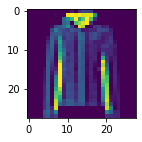

In [19]:
# true image (ship)
plt.figure(figsize=(2,2))
plt.imshow(test_images[6])

In [20]:
# predicted label
class_names[pred_classes[6]]

'Coat'

In [21]:
# compare true vs prediced
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.86      0.87      1000
           3       0.91      0.92      0.91      1000
           4       0.86      0.87      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.96      0.99      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

